# Измерение давления
### Борунов Семён Сергеевич НММбд01-22

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Задача 1
Считать данные, получить графики для пяти примеров начиная с N=(P%17)+1, где P - ваш номер в списке, научиться по осциллограмме получать значения давления

In [2]:
P=68
(P%17)+1

1

Мои номера измерений это 11, 14, 15, 20, 5

In [3]:
N = [11, 14, 15, 20, 5]
koeff = 8.12

In [4]:
df1 = pd.read_csv('files/11.log', delim_whitespace=True, names=['osc', 'pressure'], skiprows=1)
df1.index = df1.index - df1.index[0]
df1

,osc,pressure
0,1425.0,99.0
1,1415.0,113.0
2,1428.0,111.0
3,1438.0,89.0
4,1416.0,105.0
...,...,...
1508,1571.0,132.0
1509,1483.0,98.0
1510,1427.0,126.0
1511,1366.0,128.0


<AxesSubplot:>

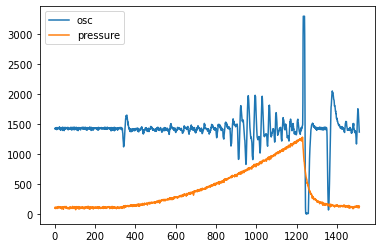

In [5]:
df1.plot()

<AxesSubplot:>

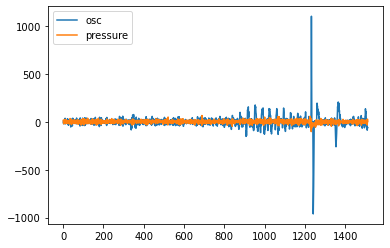

In [6]:
df1.diff().plot()

Участок, после болшого скачка проиводной нам не очень интересен, ведь там происходит спуск давления воздуха, откинем его  
Да и первые измерений 820 тоже мало информативны, на них плохо отличаются систолы и диастолы, их тоже в топку

In [7]:
start = 820
end = df1[df1.diff()['osc'] > 250].index[0] 
df1 = df1.iloc[start:end]
df1.index = df1.index - start
df1

,osc,pressure
0,1442.0,535.0
1,1478.0,540.0
2,1426.0,535.0
3,1456.0,517.0
4,1423.0,528.0
...,...,...
406,1430.0,1261.0
407,1459.0,1259.0
408,1462.0,1247.0
409,1474.0,1282.0


<AxesSubplot:>

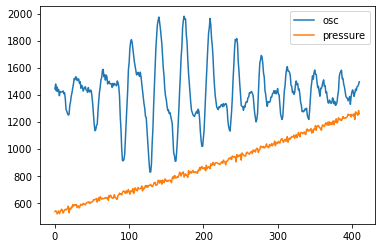

In [8]:
df1.plot()

<AxesSubplot:>

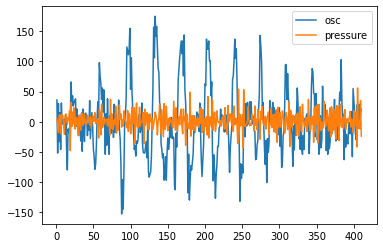

In [9]:
df1.diff().plot()

In [10]:
sys_p = df1[abs(df1.diff()['osc']) >100].mean()['pressure']/koeff
dya_p = df1.mean()['pressure']/(2*koeff) 
sys_p, dya_p

(100.45471769609702, 53.9362422542639)

Ну что-то вышло, попробуем обернуть в функцию и проделать с остальным измерениями

In [11]:
def find_pressure(df):
    global koeff
    ddf = df.diff()

    start = 820
    end = df[ddf['osc'] > 300].index[0] 
    df = df.iloc[start:end]
    df.index = df.index - start
    ddf = df.diff()

    sys_p = df[abs(ddf['osc']) >100].mean()['pressure']/koeff
    dya_p = df[ddf['pressure']< 10].mean()['pressure']/(koeff)*.66
    return sys_p, dya_p

In [12]:
for i in N:
    df = pd.read_csv('files/' + str(i) +'.log', delim_whitespace=True, names=['osc', 'pressure'], skiprows=1)
    df.index = df.index - df.index[0]
    sp, dp = find_pressure(df)
    print(f'пациент {i}: САД {round(sp)}, ДАД {round(dp)}')

пациент 11: САД 100, ДАД 71
пациент 14: САД 114, ДАД 69
пациент 15: САД 129, ДАД 88
пациент 20: САД 107, ДАД 69
пациент 5: САД 119, ДАД 89


Ну *примерно* попадает в 15мм.рт.ст интервал

## Задача 2

для номера примера N=(P%17)+1, где P - ваш номер в группе. Провести более подробные исследования осциллограмма и построить графики.
Произвести сглаживание:
Скользящим средним (окно определите самостоятельно), Экспоненциальное сглаживание  

Графиков осцилограмм вышло и так не мало, думаю хватит

In [13]:
def exponential_smoothing(series, alpha):
    result = [series[0]] # first value is same as series
    for n in range(1, len(series)):
        result.append(alpha * series[n] + (1 - alpha) * result[n-1])
    return result

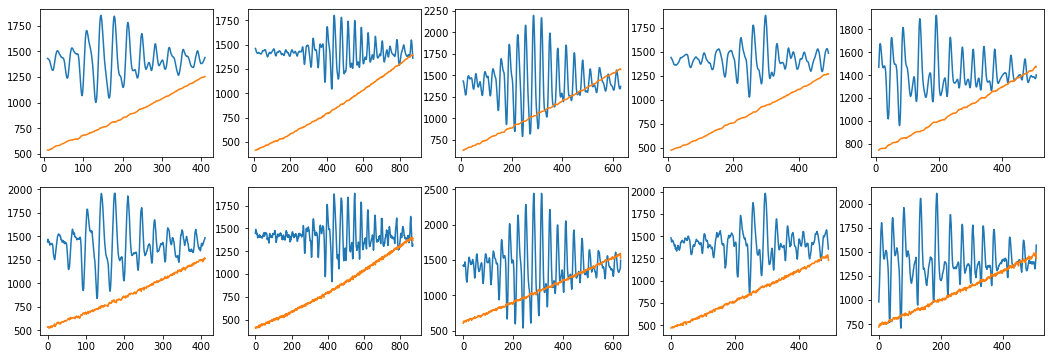

In [14]:
fig, axs = plt.subplots(2, 5, figsize=(18, 6))
for i, n in enumerate(N):
    df = pd.read_csv('files/' + str(n) +'.log', delim_whitespace=True, names=['osc', 'pressure'], skiprows=1)
    df.index = df.index - df.index[0]
    
    ddf = df.diff()
    start = 820
    end = df[ddf['osc'] > 300].index[0] 
    df = df.iloc[start:end]
    df.index = df.index - start
    
    ma = df.rolling(10).mean()
    axs[0][i].plot(ma['osc'])
    axs[0][i].plot(ma['pressure'])
    
    em = df.ewm(alpha=.66).mean()
    axs[1][i].plot(em['osc'])
    axs[1][i].plot(em['pressure'])


Кажется, что графики при скольящем среднем получаются глаже

## Задача 3

Произвести разложение в ряд Фурье и выделить наиболее значимые гармоники и построить обратное преобразование и отрисовать два графика: первоначальную осциллограмму и восстановленную по нескольким значимых гармоникам и построить графики

In [15]:
from scipy.fft import fft

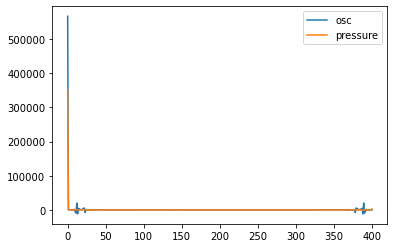

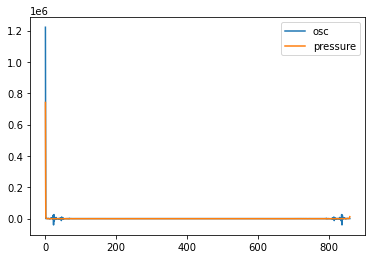

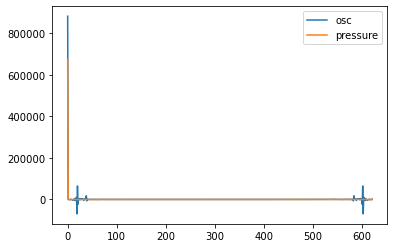

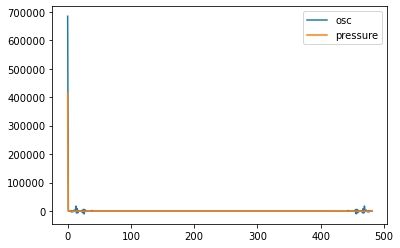

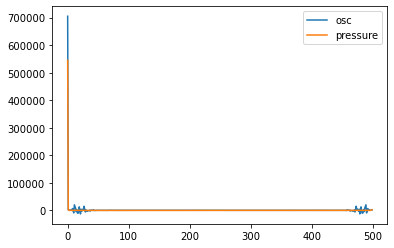

In [40]:
for n in N:
    df = pd.read_csv('files/' + str(n) +'.log', delim_whitespace=True, names=['osc', 'pressure'], skiprows=1)
    df.index = df.index - df.index[0]
    
    ddf = df.diff()
    start = 820
    end = df[ddf['osc'] > 300].index[0] 
    df = df.iloc[start:end]
    df.index = df.index - start
    
    ma = df.rolling(10).mean().iloc[10:] # раскладывать будем сглаженные ряды
    ftdf = pd.DataFrame(columns=['osc', 'pressure'])
    ftdf['osc'] = fft(ma['osc'].values).real
    ftdf['pressure'] = fft(ma['pressure'].values).real
    ftdf.plot()


In [41]:
ftdf

,osc,pressure
0,705024.100000,545046.200000
1,1491.734419,2257.845045
2,1371.421588,379.011847
3,665.397627,-313.820637
4,367.970976,-270.205901
...,...,...
495,602.432573,-532.804975
496,367.970976,-270.205901
497,665.397627,-313.820637
498,1371.421588,379.011847
